# Pulsar dataset

Information about this dataset can be found on https://archive.ics.uci.edu/ml/datasets/HTRU2

The purpose of this dataset is to determine which signal profiles correspond to the one of a pulsar or not.

In [1]:
import pandas as pd

columns = ["MeanIP", "StdIP", "ExcessKurtosisIP", "SkewnessIP",
           "MeanDMSNR", "StdDMSNR", "ExcessKurtosisDMSNR", "SkewnessDMSNR", "IsPulsar"]

df = pd.read_csv("HTRU_2.csv", names = columns, index_col= False)

df

,MeanIP,StdIP,ExcessKurtosisIP,SkewnessIP,MeanDMSNR,StdDMSNR,ExcessKurtosisDMSNR,SkewnessDMSNR,IsPulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


## I. Univariate

The first thing to do with a dataset is to know the data. We skip the data cleaning part to focus on the mathematical part. The relevant informations for statistics is to know the means and deviations of the various numeric variables.

In [2]:
df.describe()

,MeanIP,StdIP,ExcessKurtosisIP,SkewnessIP,MeanDMSNR,StdDMSNR,ExcessKurtosisDMSNR,SkewnessDMSNR,IsPulsar
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


The ***describe*** method is useful to have a summary of the various values (mean, std, but also quartiles, min and max). But information is interpreted with more ease graphically. To achieve this we can use **boxplots**.
Boxplots provides as information :
- the median as an horizontal line,
- the two 25% and 75% interquartiles as limits of the box,
- whiskers that goes toward the last point, but doesn't exten more than 1.5 times the distance from median to Q2/3
- dots for point which could be interpreted as outliers

Some care has to be taken before dealing with those points before considering them too soon as outliers, and a close investigation may have to be done. Sometime the outliers are just what we are looking for.

*Notice that you can extract the percentage of pulsars from the IsPulsar column*

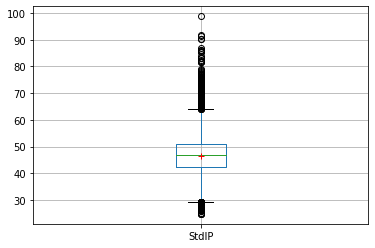

In [3]:
df.boxplot(["StdIP"], showmeans = True, meanprops = {'marker' : '+', 'markeredgecolor' : 'red'})

The distribution of values can be examined with histograms. The bins have to be tuned mainly depending of the size of your dataset.

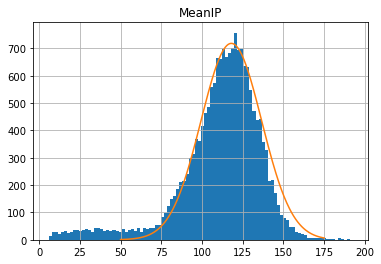

In [5]:
import matplotlib.pyplot as plt
import numpy as np

m = 118
sigma = 18.6
gauss = lambda x : np.sqrt(0.5/np.pi) * np.exp(-0.5*(x - m)**2/sigma**2)

X = np.linspace(50, 175, 300)
Y = gauss(X) * 1800



df.hist("MeanIP", bins = 100)
plt.plot(X, Y)

## II. Bivariate analysis

One by one, the information provided by the variables is not enough. We need to investigate joint properties of the data. This can be done graphically using scatter plots

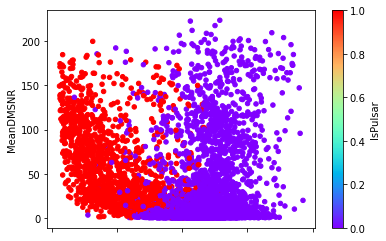

In [6]:
# pour les distributions conditionnelles
# df_0 = df[df.IsPulsar == 0 ]
# df_1 = df[df.IsPulsar == 1 ]

df.plot.scatter(x = 'MeanIP', y = 'MeanDMSNR', c = 'IsPulsar', colormap = 'rainbow', alpha = 1.)
# df_1.plot.scatter(x = 'MeanIP', y = 'MeanDMSNR')

In [6]:
# exemple d'emploi de masque booleen
df [ df.IsPulsar == 0]

,MeanIP,StdIP,ExcessKurtosisIP,SkewnessIP,MeanDMSNR,StdDMSNR,ExcessKurtosisDMSNR,SkewnessDMSNR,IsPulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [7]:
# Pour utiliser la sous dataframe si définie
# df_1.describe()

,MeanIP,StdIP,ExcessKurtosisIP,SkewnessIP,MeanDMSNR,StdDMSNR,ExcessKurtosisDMSNR,SkewnessDMSNR,IsPulsar
count,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.0
mean,56.690608,38.710598,3.130655,15.553576,49.825995,56.468963,2.757069,17.931728,1.0
std,30.007707,8.033614,1.872861,13.997200,45.287932,19.731080,3.105945,50.896263,0.0
min,5.812500,24.772042,-0.094888,-1.139069,0.486622,7.658623,-1.862320,-1.874683,1.0
25%,31.777344,32.284803,1.556038,3.805492,12.759615,43.333643,0.756451,-0.228294,1.0
50%,54.296875,37.341297,2.961258,11.609644,33.494983,59.367088,1.918327,2.585145,1.0
75%,79.277344,43.759278,4.586930,24.881853,78.313545,70.985965,3.709978,13.469687,1.0
max,139.257812,83.796909,8.069522,68.101622,199.577759,109.655345,30.883882,1017.383180,1.0


In [8]:
# autre exemple de masque booleen
df[df.MeanIP < 60].describe()

,MeanIP,StdIP,ExcessKurtosisIP,SkewnessIP,MeanDMSNR,StdDMSNR,ExcessKurtosisDMSNR,SkewnessDMSNR,IsPulsar
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,34.500706,35.428159,4.430469,24.155988,67.706643,63.283915,1.502237,4.859285,0.972340
std,14.853840,7.173739,1.326897,12.607811,44.661953,14.142138,1.771704,21.046749,0.164083
min,5.812500,24.772042,1.406391,0.089520,0.636288,10.566986,-1.862320,-1.883765,0.000000
25%,22.533203,30.601267,3.409614,13.897858,30.019649,55.491797,0.415530,-0.551180,1.000000
50%,35.031250,33.440784,4.359295,22.288854,61.941472,65.141883,1.112206,0.620599,1.000000
75%,46.960938,38.072091,5.411158,32.538067,100.007107,72.703531,2.168243,4.146533,1.000000
max,59.992188,85.797340,8.069522,68.101622,199.577759,106.799174,21.017232,466.135457,1.000000


## Regression

Two or more variables can be linked through linear regression using the ***Scikit Learn*** library.

With linear regression we find optimal coefficient minimizing $\mathbb{E}(|Y - (aX +b)|^2)$

In [10]:
import numpy as np
from sklearn import linear_model

# We need to define feature and target arrays (the feature array have dim (n_sample, n_features))
X = np.array(df.MeanDMSNR).reshape(-1, 1) # X has two be a 2 dimensional array
Y = df.StdDMSNR

# We first generate an unoptimized model
reg = linear_model.LinearRegression()

# the fit method uses the examples to find optimal parameters
reg.fit(X, Y)
# we can see how good is our fit
reg.score(X, Y)

0.6344996194027146

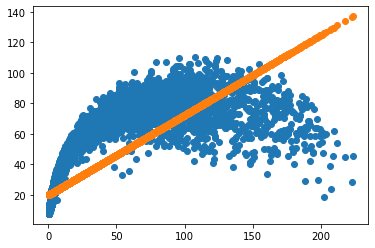

In [11]:
from matplotlib import pyplot as plt

Y_pred = reg.predict(X)

plt.scatter(X, Y)
plt.scatter(X,Y_pred)

**It doesn't always make sense to use linear regression**. Polynomial regression can offer better approximations.

## Gaussian naive Bayes

Les méthodes type naive bayes estiment des probabilités conditionnelles $P(X_1 ... X_n | Y)$ afin d'obtenir  $P(Y | X_1 ... X_n)$. Comme les variables apparaissant ici sont continues, nous faisons de plus l'hypothèse que leur distribution est Gaussienne.

In [15]:
from sklearn.naive_bayes import GaussianNB

# Nous définissons un classificateur non initialisé
clf = GaussianNB()
X = np.array(df.iloc[:, :-1]) # nous extrayons les données
Y = np.array(df.iloc[:, -1]) # Nous précisons les labels

clf.fit(X,Y)

GaussianNB()

**Questions :**
1) Quelle est l'accuracy du model ? sur les pulsars seulement ? sur les non-pulsars ? quelle est la matrice de confusion du modèle ?

2) Comment se lisent les probabilités sur un ou plusieurs exemples ? Qu'est-ce qu'une log probabilité et quelle peut être son intérêt ?

3) Trouvez à partir de la documentation comment pondérer les pulsars. Qu'obtient-on ? Proposez votre propre stratégie pour améliorer le modèle, et testez la.
 
4) Nous avons utilisé tout le set de donné. Quels problèmes ceci peut causer ?

In [21]:
# votre code

## Principal component analysis

La méthode PCA se base sur la diagonalisation de la matrice de covariance. Elle génère des combinaisons des variables entrées pour obtenir des quantitées dérivées indépendentes. Elle peut être exploitée pour réduire les dimensions d'un problème.

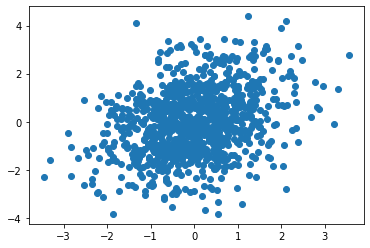

In [40]:
# Ajouter explications

V = np.random.multivariate_normal((0,0), [[1,0.5],[0.5, 2]], 1000)

plt.scatter(V[:,0], V[:,1])



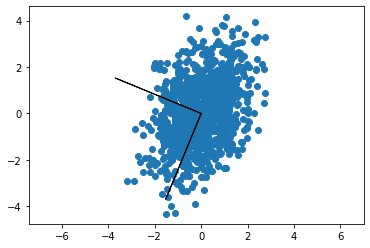

[[-0.38182704 -0.9242338 ]
 [-0.9242338   0.38182704]]


In [39]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(V)
plt.scatter(V[:,0], V[:,1])

components = pca.components_

plt.arrow(0,0, 4*components[0,0], 4*components[0,1])
plt.arrow(0,0, 4*components[1,0], 4*components[1,1])
plt.axis('equal')
plt.show()
print(components)

In [22]:
from sklearn.decomposition import PCA

pca = PCA()

X = np.array(df.iloc[:, :-1]) # nous extrayons les données

pca.fit(X)

pca.explained_variance_ratio_

array([8.71053041e-01, 7.81934383e-02, 4.11562290e-02, 6.15967691e-03,
       2.43717952e-03, 9.58578490e-04, 3.90570992e-05, 2.79968662e-06])